In [16]:
import tensorflow as tf
from tensorflow import keras
import os,datetime



In [17]:
mnist = tf.keras.datasets.mnist

In [18]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Shape is: (28, 28)


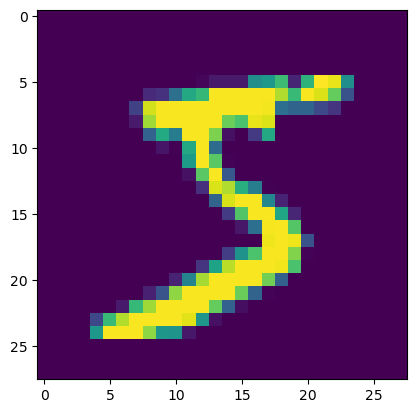

First Digit in y_train is 5


In [19]:
print("Shape is:", x_train[0].shape)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print("First Digit in y_train is",y_train[0])

In [20]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation='softmax')])

In [22]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [23]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [24]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
checkpoint_path, monitor='val_acc', verbose=1, save_weights_only=True,
save_frequency='epoch')


In [ ]:
history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test), callbacks=[tensorboard_callback, checkpoint_callback])
loss, acc = model.evaluate(x_test, y_test,verbose=1)
print("Original model, accuracy: {:5.2f}%".format(100*acc))


Epoch 1/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.9341
Epoch 1: saving model to training_2\cp-0001.ckpt
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2211 - accuracy: 0.9342 - val_loss: 0.1033 - val_accuracy: 0.9684
Epoch 2/5
1682/1875 [=========================>....] - ETA: 1s - loss: 0.0988 - accuracy: 0.9701

In [ ]:
model.save('MyModel',save_format='tf')

In [ ]:
loaded_model = tf.keras.models.load_model('MyModel')
loaded_loss, loaded_acc = loaded_model.evaluate(x_test, y_test,verbose=1)
print("Loaded model, accuracy: {:5.2f}%".format(100*loaded_acc))

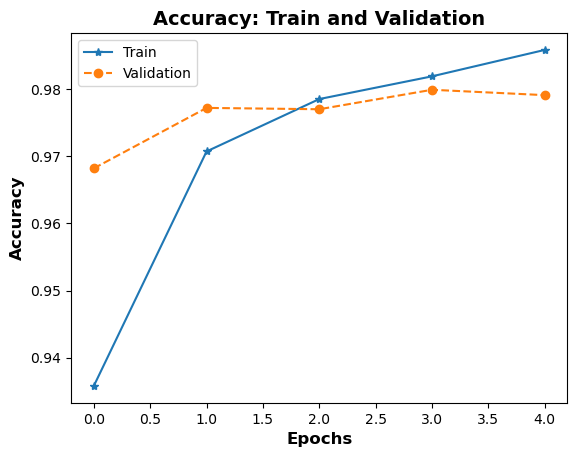

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'-*')
plt.plot(history.history['val_accuracy'],'--o')
plt.title('Accuracy: Train and Validation', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.legend(["Train","Validation"], loc="upper left")
plt.show()